## Pranav Bhagat

### Report : Food Coupon Campaign

## 1. Objective

We have been provided with a dataset which contains answers about a survey conducted among the students of University of Pacific. This survey deals with the eating habits of the students about what they prefer to eat and their food choices. The dataset contains information about the GPA, Gender, sport activities, exercise regime as well as food choices such as Veggie intake, chicken calories consumed, fries as well as other food stuffs. It also contains details about which type of cuisines - greek, italian, Indian - the students prefer.

University of the Pacific is holding a all you can eat buffet. For this the university wants to invite all the students. To ensure maximum students visit the buffet, the university is planning on launching a coupon campaign. The university wants to provide specific coupons to attract certain type of individuals to the buffet.

For this the university wants to recognise which kind of food the students prefer. The university wants to make sure maximum students attend, hence they want to provide personalized coupons which cater to the individuals' taste. For this the university wants us to draw a list based on what kind of coupons to provide to certain individuals. 

We will create a dendogram using the appropriate libraries and then run k means clustering on that to find what kind of coupons to provide to individuals.

## 2. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

In [2]:
d = pd.read_csv("C:/Python/FoodCode.csv")

In [3]:
d.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


Here I have printed the top 5 rows using head command

In [4]:
d['calories_chicken'].quantile([0.25,0.5,0.75])

0.25    430.0
0.50    610.0
0.75    720.0
Name: calories_chicken, dtype: float64

Here I have used the quantile command to display the percentile

In [5]:
d.count()

GPA                             121
Gender                          125
breakfast                       125
calories_chicken                125
calories_day                    106
calories_scone                  124
coffee                          125
comfort_food                    124
comfort_food_reasons            124
comfort_food_reasons_coded      106
cook                            122
comfort_food_reasons_coded.1    125
cuisine                         108
diet_current                    124
diet_current_coded              125
drink                           123
eating_changes                  122
eating_changes_coded            125
eating_changes_coded1           125
eating_out                      125
employment                      116
ethnic_food                     125
exercise                        112
father_education                124
father_profession               122
fav_cuisine                     123
fav_cuisine_coded               125
fav_food                    

Here we can see the number of values each column has. As we can see, not all columns have the same values, hence we need to perform some data cleaning.

In [6]:
len(d.columns)

61

Here I have used the len command to display the number of columns in the dataset. 

## 3. Dendrogram

In [7]:
df1 = d[['indian_food', 'italian_food', 'greek_food']]

In [8]:
df1.columns = ["Indian", "Italian", "Greek"]
df2 = df1.dropna()
df2.head(5)

,Indian,Italian,Greek
0,5,5,5
1,4,4,4
2,5,5,5
3,5,5,5
4,2,5,4


Here we create a new dataframe with 3 columns to carry out our analysis.

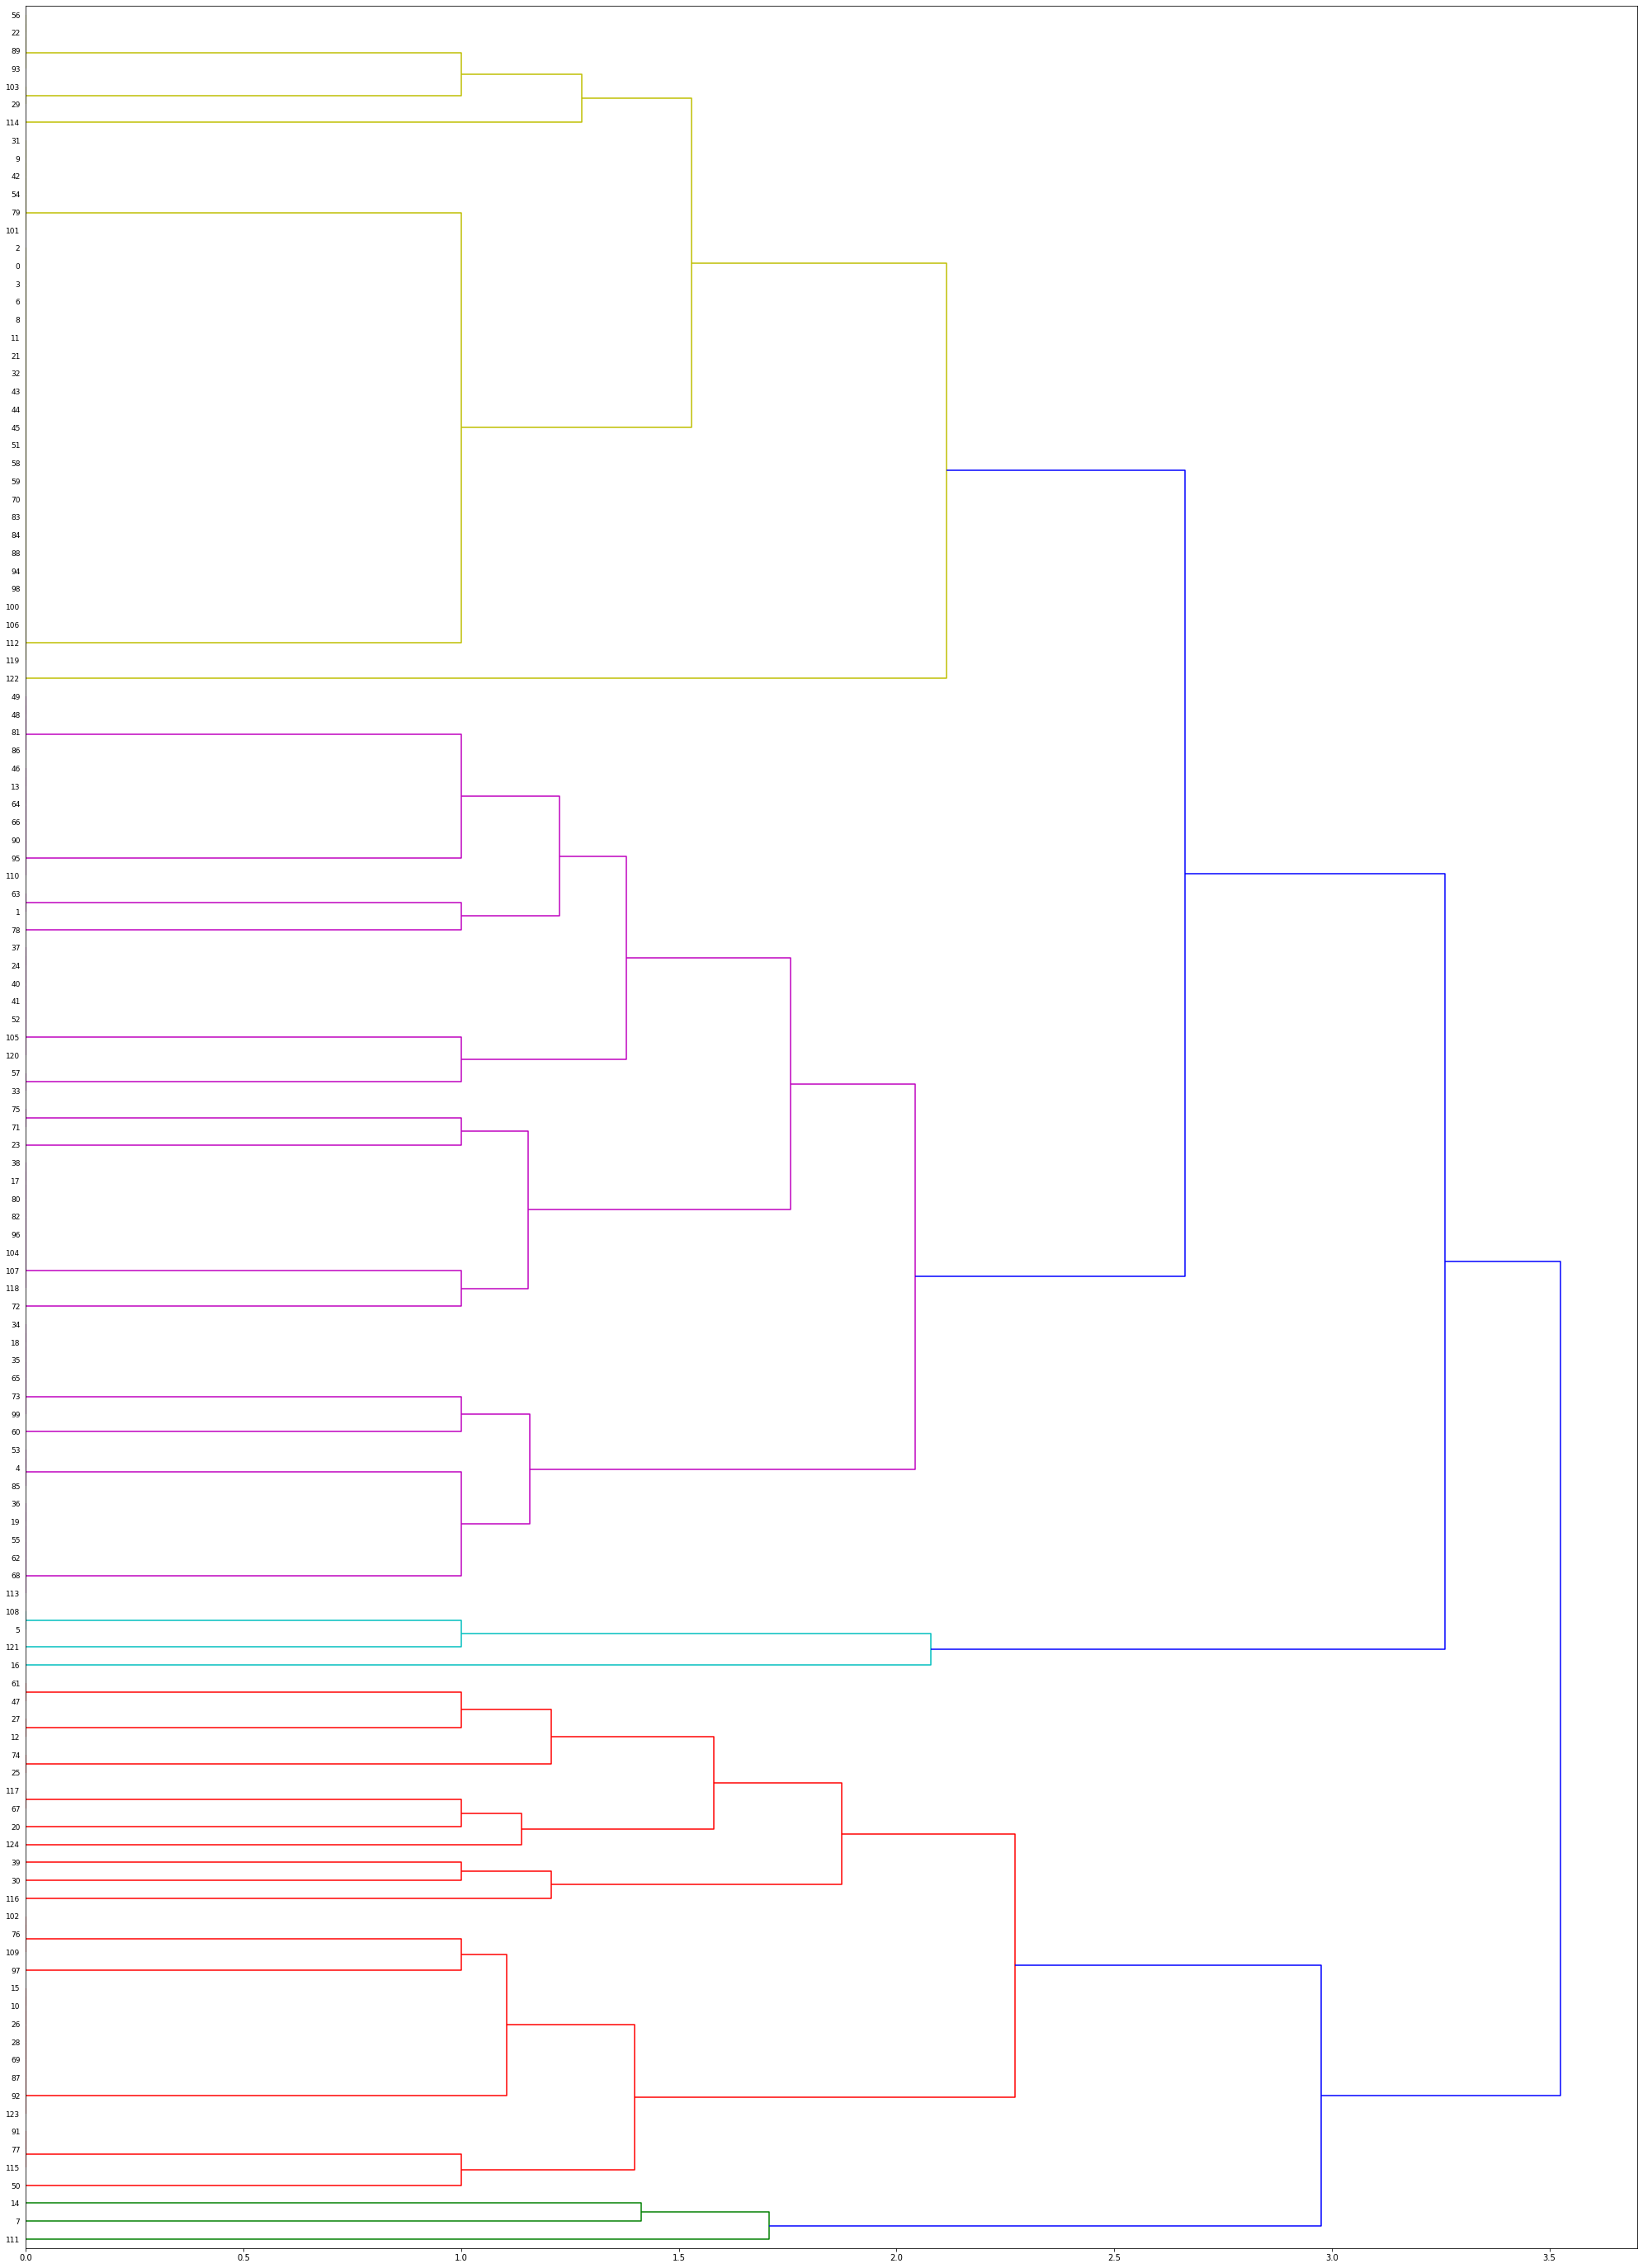

In [9]:
Z = linkage(df2, 'average')
plt.figure(figsize=(35, 50))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=9, labels = df2.index)

Here I have plotted a dendrogram based on the above algorithms.

## 4. Step by Step K means

In [10]:
model = KMeans(n_clusters=6)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
model.labels_

array([2, 0, 2, 2, 4, 5, 2, 4, 2, 2, 3, 2, 1, 0, 1, 3, 5, 1, 4, 4, 3, 2,
       2, 5, 0, 1, 3, 1, 3, 5, 1, 2, 2, 0, 4, 4, 4, 0, 1, 1, 0, 0, 2, 2,
       2, 2, 0, 1, 0, 0, 3, 2, 0, 4, 2, 4, 2, 0, 2, 2, 4, 1, 4, 0, 0, 4,
       0, 1, 4, 3, 2, 5, 1, 4, 1, 5, 3, 3, 0, 2, 1, 0, 1, 2, 2, 4, 0, 3,
       2, 2, 0, 3, 3, 2, 2, 0, 1, 3, 2, 4, 2, 2, 3, 5, 1, 0, 2, 1, 5, 3,
       0, 4, 2, 4, 5, 3, 3, 1, 1, 2, 0, 5, 2, 3, 1])

In [12]:
k=3
DendClus = fcluster(Z, k, criterion='maxclust')
DendClus

array([3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 2, 3, 3, 3, 1, 3,
       3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 1,
       3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1], dtype=int32)

<Figure size 432x288 with 0 Axes>

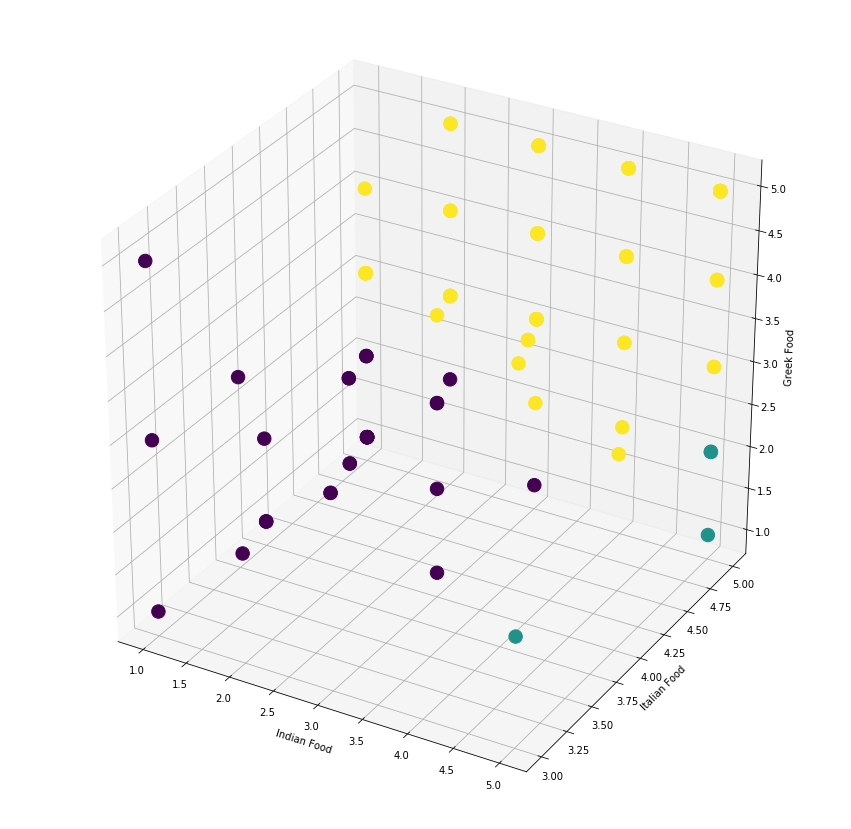

In [13]:
fig = plt.figure()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = df2.Indian,ys = df2.Italian, zs = df2.Greek, c = DendClus, 
           s = 180, depthshade = False)
ax.set_xlabel('Indian Food')
ax.set_ylabel('Italian Food')
ax.set_zlabel('Greek Food')

plt.show()

Here I have displayed the clusters based on step by step k means algorithm.

## 5. kmeans clusters

In [14]:
model = KMeans(n_clusters=3)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
model.labels_

array([2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2,
       2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       2, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1])

In [16]:
df3 = pd.concat([df2, pd.Series(model.labels_)], axis=1)
df3.columns = ['IndFood', 'ItalianFood', 'GreekFood','Association']
df3.head(5)

,IndFood,ItalianFood,GreekFood,Association
0,5,5,5,2
1,4,4,4,2
2,5,5,5,2
3,5,5,5,2
4,2,5,4,0


In [17]:
Asso = df3.groupby('Association')
Asso.Association.count()

Association
0    46
1    31
2    48
Name: Association, dtype: int64

From this we can see that 52 students have given higher rating to Indian Food, 29 to Italian Food and 44 to Greek Food. 

## 6. Prediction

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN1 = KNeighborsClassifier(n_neighbors = 5, p = 2)
KNN1.fit(df3[["IndFood", "ItalianFood","GreekFood"]], 
        df3.Association)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
def coupon(Indian,Italian,Greek):
    asso1 = KNN1.predict(np.array([Indian, Italian, Greek]).reshape(1, -1))[0]
    CouponCode = ["Indian Food Coupon", "Italian Food Coupon", "Greek Food Coupon"]
    return CouponCode[asso1]

In [20]:
for i in range(10):
    CouponCode = coupon(int(input('Indian Food: ')),int(input('Italian Food: ')),int(input('Greek Food: ')))
    print("The student will get:", CouponCode)

Indian Food: 2
Italian Food: 3
Greek Food: 5
The student will get: Indian Food Coupon
Indian Food: 1
Italian Food: 2
Greek Food: 1
The student will get: Italian Food Coupon
Indian Food: 4
Italian Food: 5
Greek Food: 2
The student will get: Indian Food Coupon
Indian Food: 3
Italian Food: 4
Greek Food: 5
The student will get: Indian Food Coupon
Indian Food: 1
Italian Food: 4
Greek Food: 3
The student will get: Italian Food Coupon
Indian Food: 1
Italian Food: 2
Greek Food: 4
The student will get: Indian Food Coupon
Indian Food: 5
Italian Food: 4
Greek Food: 1
The student will get: Greek Food Coupon
Indian Food: 3
Italian Food: 3
Greek Food: 4
The student will get: Indian Food Coupon
Indian Food: 4
Italian Food: 2
Greek Food: 1
The student will get: Italian Food Coupon
Indian Food: 2
Italian Food: 4
Greek Food: 1
The student will get: Italian Food Coupon


Here I have used for loop to predict which type of coupon to present to which individual.

## 7. Summary

We have created a dendogram in #3 which was used to determine the number of clusters that we have. From this dendogram, we divided the data into clusters. Three clusters were formed on the basis of people who have given higher rating to either Indian, Italian or Greek food. In this algorithm, we created the clusters by ourselves.

In #5, I used kmeans clustering which was done by generating random centroids. From these random centroids, I formed 3 clusters. In the analysis we can see that 52 students should be provided with coupons related to indian food, 29 related to Italian food and 44 related to Greek Food.

In #6 I created afor loop which gives us the type of coupons the students should be provided with after entering their preference for a specific cuisine.

# 8. Recommendation

According to the report, the students should be asked for their preference for the 3 types of cuisines mentioned on a scale of 5. Then after entering the ratings into #6, the computer can provide with what type of coupons should be recommended to a individual for maximum partipication in the buffet.